In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [2]:
f = open("images/sino1.txt", 'r')
line = f.read()
print(line)
f.close

   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+

<function TextIOWrapper.close()>

In [3]:
import numpy as np
metal3_img = np.zeros((256,360))
k = 0
l = 0
for i, j in enumerate(line):
    if j == '\t':
        metal3_img[k,l] = float(line[i-14:i])
        k = k+1
        if k == 256:
            k = 0
            l = l+1

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

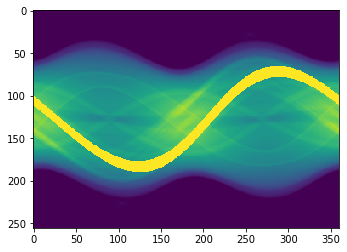

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

plt.imshow(metal3_img)
plt.colorbar

In [5]:
metal3_img.shape

(256, 360)

In [6]:
result_img = metal3_img
window_size = 3

k = 0
z = 0

for i in range(256-window_size-1):
    for j in range(30-window_size):
        if 0 in result_img[i:i+window_size+1,j:j+window_size]:
            z=0
        else:
            if 30 in result_img[i:i+window_size+1,j:j+window_size]:
                z = 0
            else:
                k = k+1
train_data = np.zeros((k,window_size,window_size,1))
result_data = np.zeros((k,1))

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (1, 1), activation='relu', input_shape=(3, 3, 1)))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(300, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 3, 3, 32)          64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 64)          2112      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          4160      
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [8]:
k = 0

for i in range(256-window_size-1):
    for j in range(30-window_size):
        if 0 in result_img[i:i+1+window_size,j:j+window_size]:
            z=0
        else:
            if 300 in result_img[i:i+1+window_size,j:j+window_size]:
                z = 0
            else:
                for v in range(window_size):
                    for w in range(window_size):
                        train_data[k,w,v,0] = result_img[i+w,j+v]
                result_data[k,0] = int(result_img[i+window_size,j])
                k = k+1
print(train_data.shape)
print(result_data.shape)

model.fit(train_data, result_data, epochs=1000)

(4868, 3, 3, 1)
(4868, 1)
Epoch 1/1000
153/153 [==============================] - 0s 2ms/step - loss: 4.9187 - accuracy: 0.2890
Epoch 2/1000
153/153 [==============================] - 0s 2ms/step - loss: 3.5862 - accuracy: 0.3309
Epoch 3/1000
153/153 [==============================] - 0s 2ms/step - loss: 3.4047 - accuracy: 0.3537
Epoch 4/1000
153/153 [==============================] - 0s 2ms/step - loss: 3.3484 - accuracy: 0.3554
Epoch 5/1000
153/153 [==============================] - 0s 2ms/step - loss: 3.3007 - accuracy: 0.3558
Epoch 6/1000
153/153 [==============================] - 0s 2ms/step - loss: 3.2705 - accuracy: 0.3548
Epoch 7/1000
153/153 [==============================] - 0s 2ms/step - loss: 3.2308 - accuracy: 0.3556
Epoch 8/1000
153/153 [==============================] - 0s 2ms/step - loss: 3.2126 - accuracy: 0.3591
Epoch 9/1000
153/153 [==============================] - 0s 2ms/step - loss: 3.1767 - accuracy: 0.3601
Epoch 10/1000
153/153 [==============================] -

153/153 [==============================] - 0s 2ms/step - loss: 2.1501 - accuracy: 0.4030
Epoch 81/1000
153/153 [==============================] - 0s 2ms/step - loss: 2.1612 - accuracy: 0.4032
Epoch 82/1000
153/153 [==============================] - 0s 2ms/step - loss: 2.1690 - accuracy: 0.4065
Epoch 83/1000
153/153 [==============================] - 0s 2ms/step - loss: 2.1337 - accuracy: 0.4061
Epoch 84/1000
153/153 [==============================] - 0s 2ms/step - loss: 2.1444 - accuracy: 0.4049
Epoch 85/1000
153/153 [==============================] - 0s 2ms/step - loss: 2.1451 - accuracy: 0.4024
Epoch 86/1000
153/153 [==============================] - 0s 2ms/step - loss: 2.1484 - accuracy: 0.4053
Epoch 87/1000
153/153 [==============================] - 0s 2ms/step - loss: 2.1133 - accuracy: 0.4094
Epoch 88/1000
153/153 [==============================] - 0s 2ms/step - loss: 2.1262 - accuracy: 0.4024
Epoch 89/1000
153/153 [==============================] - 0s 2ms/step - loss: 2.1067 - a

153/153 [==============================] - 0s 2ms/step - loss: 1.9995 - accuracy: 0.4201
Epoch 160/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.9951 - accuracy: 0.4176
Epoch 161/1000
153/153 [==============================] - 0s 2ms/step - loss: 2.0219 - accuracy: 0.4154
Epoch 162/1000
153/153 [==============================] - 0s 2ms/step - loss: 2.0221 - accuracy: 0.4174
Epoch 163/1000
153/153 [==============================] - 0s 2ms/step - loss: 2.0057 - accuracy: 0.4238
Epoch 164/1000
153/153 [==============================] - 0s 2ms/step - loss: 2.0031 - accuracy: 0.4228
Epoch 165/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.9876 - accuracy: 0.4242
Epoch 166/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.9794 - accuracy: 0.4193
Epoch 167/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.9891 - accuracy: 0.4211
Epoch 168/1000
153/153 [==============================] - 0s 2ms/step - loss: 1

153/153 [==============================] - 0s 2ms/step - loss: 1.8916 - accuracy: 0.4365
Epoch 238/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.8895 - accuracy: 0.4371
Epoch 239/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.8901 - accuracy: 0.4396
Epoch 240/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.8762 - accuracy: 0.4359
Epoch 241/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.8732 - accuracy: 0.4359
Epoch 242/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.8819 - accuracy: 0.4371
Epoch 243/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.8712 - accuracy: 0.4371
Epoch 244/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.8833 - accuracy: 0.4361
Epoch 245/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.8806 - accuracy: 0.4347
Epoch 246/1000
153/153 [==============================] - 0s 2ms/step - loss: 1

153/153 [==============================] - 0s 2ms/step - loss: 1.8022 - accuracy: 0.4456
Epoch 316/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.7906 - accuracy: 0.4476
Epoch 317/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.8079 - accuracy: 0.4447
Epoch 318/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.8075 - accuracy: 0.4482
Epoch 319/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.8172 - accuracy: 0.4419
Epoch 320/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.8086 - accuracy: 0.4437
Epoch 321/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.8060 - accuracy: 0.4452
Epoch 322/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.8034 - accuracy: 0.4478
Epoch 323/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.8125 - accuracy: 0.4507
Epoch 324/1000
153/153 [==============================] - 0s 2ms/step - loss: 1

153/153 [==============================] - 0s 2ms/step - loss: 1.7807 - accuracy: 0.4491
Epoch 394/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.7590 - accuracy: 0.4523
Epoch 395/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.7541 - accuracy: 0.4536
Epoch 396/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.7588 - accuracy: 0.4488
Epoch 397/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.7524 - accuracy: 0.4509
Epoch 398/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.7882 - accuracy: 0.4505
Epoch 399/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.7635 - accuracy: 0.4552
Epoch 400/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.7626 - accuracy: 0.4517
Epoch 401/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.7776 - accuracy: 0.4505
Epoch 402/1000
153/153 [==============================] - 0s 2ms/step - loss: 1

153/153 [==============================] - 0s 2ms/step - loss: 1.7166 - accuracy: 0.4597
Epoch 472/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.7362 - accuracy: 0.4616
Epoch 473/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.7560 - accuracy: 0.4579
Epoch 474/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.7313 - accuracy: 0.4581
Epoch 475/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.7384 - accuracy: 0.4550
Epoch 476/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.7075 - accuracy: 0.4643
Epoch 477/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.7120 - accuracy: 0.4589
Epoch 478/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.7770 - accuracy: 0.4482
Epoch 479/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.7447 - accuracy: 0.4587
Epoch 480/1000
153/153 [==============================] - 0s 2ms/step - loss: 1

153/153 [==============================] - 0s 2ms/step - loss: 1.7059 - accuracy: 0.4643
Epoch 550/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.6892 - accuracy: 0.4671
Epoch 551/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.6878 - accuracy: 0.4653
Epoch 552/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.7351 - accuracy: 0.4562
Epoch 553/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.7007 - accuracy: 0.4727
Epoch 554/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.6842 - accuracy: 0.4659
Epoch 555/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.6914 - accuracy: 0.4649: 0s - loss: 1.6100 - accura
Epoch 556/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.6952 - accuracy: 0.4614
Epoch 557/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.6933 - accuracy: 0.4675
Epoch 558/1000
153/153 [===========================

153/153 [==============================] - 0s 2ms/step - loss: 1.7152 - accuracy: 0.4612
Epoch 628/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.6590 - accuracy: 0.4680
Epoch 629/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.6656 - accuracy: 0.4684
Epoch 630/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.6684 - accuracy: 0.4708
Epoch 631/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.6639 - accuracy: 0.4661
Epoch 632/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.6444 - accuracy: 0.4747
Epoch 633/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.6984 - accuracy: 0.4649
Epoch 634/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.6890 - accuracy: 0.4641
Epoch 635/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.6791 - accuracy: 0.4641
Epoch 636/1000
153/153 [==============================] - 0s 2ms/step - loss: 1

153/153 [==============================] - 0s 2ms/step - loss: 1.6910 - accuracy: 0.4641
Epoch 706/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.6362 - accuracy: 0.4745
Epoch 707/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.6237 - accuracy: 0.4756
Epoch 708/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.6399 - accuracy: 0.4690
Epoch 709/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.6635 - accuracy: 0.4692
Epoch 710/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.6441 - accuracy: 0.4671
Epoch 711/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.6546 - accuracy: 0.4671
Epoch 712/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.6544 - accuracy: 0.4698
Epoch 713/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.6372 - accuracy: 0.4749
Epoch 714/1000
153/153 [==============================] - 0s 2ms/step - loss: 1

153/153 [==============================] - 0s 2ms/step - loss: 1.6319 - accuracy: 0.4749
Epoch 784/1000
153/153 [==============================] - 0s 2ms/step - loss: 1.6188 - accuracy: 0.4774
Epoch 785/1000
153/153 [==============================] - 1s 5ms/step - loss: 1.6151 - accuracy: 0.4793
Epoch 786/1000
153/153 [==============================] - 1s 5ms/step - loss: 1.6402 - accuracy: 0.4753
Epoch 787/1000
153/153 [==============================] - 1s 5ms/step - loss: 1.6257 - accuracy: 0.4774
Epoch 788/1000
153/153 [==============================] - 1s 4ms/step - loss: 1.6389 - accuracy: 0.4776
Epoch 789/1000
153/153 [==============================] - 1s 5ms/step - loss: 1.6849 - accuracy: 0.4620
Epoch 790/1000
153/153 [==============================] - 1s 4ms/step - loss: 1.6131 - accuracy: 0.4766
Epoch 791/1000
153/153 [==============================] - 1s 5ms/step - loss: 1.6194 - accuracy: 0.4764
Epoch 792/1000
153/153 [==============================] - 1s 5ms/step - loss: 1

153/153 [==============================] - 1s 5ms/step - loss: 1.6058 - accuracy: 0.4823
Epoch 861/1000
153/153 [==============================] - 1s 5ms/step - loss: 1.5919 - accuracy: 0.4873
Epoch 862/1000
153/153 [==============================] - ETA: 0s - loss: 1.6368 - accuracy: 0.48 - 1s 5ms/step - loss: 1.6429 - accuracy: 0.4797
Epoch 863/1000
153/153 [==============================] - 1s 5ms/step - loss: 1.6155 - accuracy: 0.4758
Epoch 864/1000
153/153 [==============================] - 1s 5ms/step - loss: 1.6081 - accuracy: 0.4807
Epoch 865/1000
153/153 [==============================] - 1s 5ms/step - loss: 1.6055 - accuracy: 0.4813
Epoch 866/1000
153/153 [==============================] - 1s 5ms/step - loss: 1.5870 - accuracy: 0.4848
Epoch 867/1000
153/153 [==============================] - 1s 5ms/step - loss: 1.6059 - accuracy: 0.4799: 0s - loss: 1
Epoch 868/1000
153/153 [==============================] - 1s 5ms/step - loss: 1.6022 - accuracy: 0.4793
Epoch 869/1000
153/153 

153/153 [==============================] - 1s 7ms/step - loss: 1.5805 - accuracy: 0.4912
Epoch 938/1000
153/153 [==============================] - 1s 7ms/step - loss: 1.6274 - accuracy: 0.4764
Epoch 939/1000
153/153 [==============================] - 1s 7ms/step - loss: 1.6027 - accuracy: 0.4801
Epoch 940/1000
153/153 [==============================] - 1s 7ms/step - loss: 1.5910 - accuracy: 0.4809
Epoch 941/1000
153/153 [==============================] - 1s 7ms/step - loss: 1.5991 - accuracy: 0.4838
Epoch 942/1000
153/153 [==============================] - 1s 6ms/step - loss: 1.5943 - accuracy: 0.4862
Epoch 943/1000
153/153 [==============================] - 1s 7ms/step - loss: 1.5782 - accuracy: 0.4934
Epoch 944/1000
153/153 [==============================] - 1s 7ms/step - loss: 1.5846 - accuracy: 0.4862
Epoch 945/1000
153/153 [==============================] - 1s 7ms/step - loss: 1.5990 - accuracy: 0.4821
Epoch 946/1000
153/153 [==============================] - 1s 6ms/step - loss: 1

In [9]:
for i in range(256-window_size-1):
    for j in range(30-window_size):
        if result_img[i+window_size,j] == 300:
            test_data = np.zeros((1,window_size,window_size,1))
            for v in range(window_size):
                for w in range(window_size):
                    test_data[0,w,v,0] = result_img[i+w,j+v]
            prediction = model.predict(test_data)
            result_img[i+window_size,j] = np.where(prediction[0]==max(prediction[0]))[0][0]
            print(np.where(prediction[0]==max(prediction[0]))[0][0])

217
217
217
217
217
217
217
217
229
217
217
217
229
229
217
217
217
229
229
229
229
217
217
217
229
229
229
229
229
217
217
217
228
229
229
229
229
229
217
217
217
228
228
229
229
229
229
229
217
217
217
228
228
228
228
229
229
229
238
217
217
217
228
228
228
228
228
229
229
241
238
229
217
217
217
228
228
228
228
228
229
229
241
241
229
229
217
217
228
228
228
228
228
229
229
241
241
229
229
229
217
228
228
228
228
228
228
228
241
241
228
229
229
229
228
228
228
228
228
228
241
241
228
228
229
229
229
228
228
228
228
228
241
241
228
228
228
229
229
229
229
228
228
228
228
241
241
228
228
228
228
228
228
229
228
228
228
241
241
228
228
228
228
228
228
229
229
217
228
241
241
228
228
228
228
228
228
228
228
217
217
241
241
228
228
228
228
228
228
228
228
217
217
217
241
228
228
228
228
228
228
228
228
217
217
217
228
228
228
228
228
228
228
228
229
217
217
217
229
217
217
228
228
228
228
228
229
217
217
217
228
217
217
207
228
228
228
228
229
217
217
217
228
217
217
207
228
228
228
229


<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

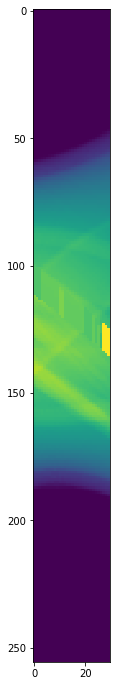

In [11]:
plt.figure(figsize=(8,12))
plt.imshow(result_img[:,0:30])
plt.colorbar

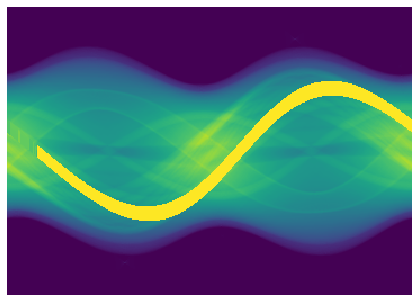

In [12]:
plt.imshow(result_img)
plt.colorbar
plt.axis('off'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
plt.savefig('images/RCNN1.png', bbox_inches = 'tight', pad_inches=0, dpi=100)

In [207]:
# np.savetxt('images/CNN_Metal3_3by3_txt.txt', result_img)